In [1]:
# imporation basique
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q wordcloud
!pip install -q nltk

In [2]:
# charger les datasets
steam_description = pd.read_csv('../raw_data/steam_description_data.csv')
df = pd.read_csv('../raw_data/data_clean.csv')

# Test sur le dataset complet

## Exploration de la donnée

### Dataset clean

In [3]:
df.head()

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,...,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,0,0,550,15000000.0,10000000,20000000,0,127873,15000000.0,107850000.0
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,0,0,0,7500000.0,5000000,10000000,1,3814,7500000.0,29925000.0
2,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,0,0,0,7500000.0,5000000,10000000,0,5538,7500000.0,29925000.0
3,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,...,0,0,0,7500000.0,5000000,10000000,1,28855,7500000.0,53925000.0
4,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,...,0,0,0,15000000.0,10000000,20000000,0,13559,15000000.0,107850000.0


### Dataset description

In [4]:
steam_description.head()

,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


### Regroupement des deux datasets

In [5]:
df_full = steam_description[['steam_appid','short_description']].merge(df, on='steam_appid')

In [6]:
df_full = df_full.rename(columns={'short_description_x':'short_description'})

In [7]:
df_full.head()

,steam_appid,short_description,name,release_date,english,developer,publisher,platforms,categories,genres,...,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu
0,10,Play the world's number 1 online action game. ...,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,550,15000000.0,10000000,20000000,0,127873,15000000.0,107850000.0
1,30,Enlist in an intense brand of Axis vs. Allied ...,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,...,0,0,0,7500000.0,5000000,10000000,1,3814,7500000.0,29925000.0
2,50,Return to the Black Mesa Research Facility as ...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,0,7500000.0,5000000,10000000,0,5538,7500000.0,29925000.0
3,70,Named Game of the Year by over 50 publications...,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,...,0,0,0,7500000.0,5000000,10000000,1,28855,7500000.0,53925000.0
4,80,"With its extensive Tour of Duty campaign, a ne...",Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,0,15000000.0,10000000,20000000,0,13559,15000000.0,107850000.0


In [8]:
# vérifier si données manquantes
df_full.isna().sum()

steam_appid          0
short_description    0
name                 0
release_date         0
english              0
                    ..
owner_upper          0
has_a_website        0
nb_review            0
owner_estimated      0
revenu               0
Length: 403, dtype: int64

In [9]:
# vérifier si présence de doublons
df_full.duplicated().sum()

0

In [10]:
# colonnes du dataset
df_full.columns

Index(['steam_appid', 'short_description', 'name', 'release_date', 'english',
       'developer', 'publisher', 'platforms', 'categories', 'genres',
       ...
       'wrestling', 'zombies', 'e_sports', 'owner_median', 'owner_lower',
       'owner_upper', 'has_a_website', 'nb_review', 'owner_estimated',
       'revenu'],
      dtype='object', length=403)

In [11]:
# informations
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26867 entries, 0 to 26866
Columns: 403 entries, steam_appid to revenu
dtypes: float64(4), int64(382), object(17)
memory usage: 82.8+ MB


> Grâce à l'exploration faite nous savons qu'il n'y pas de données manquantes ni de doublons.

## Analyse des descriptions

> Nous allons faire une analyse sur les `short_description`

### Application de NLP sur `short_description`

In [12]:
# suppression ponctuation
import string 
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df_full['short_description'] = df_full['short_description'].apply(remove_punctuations)
df_full['short_description'].head()

0    Play the worlds number 1 online action game En...
1    Enlist in an intense brand of Axis vs Allied t...
2    Return to the Black Mesa Research Facility as ...
3    Named Game of the Year by over 50 publications...
4    With its extensive Tour of Duty campaign a nea...
Name: short_description, dtype: object

In [13]:
# conversion en minuscule
def lower_case(text):
    text = text.lower()
    return text

df_full['short_description'] = df_full['short_description'].apply(lower_case)
df_full['short_description'].head()

0    play the worlds number 1 online action game en...
1    enlist in an intense brand of axis vs allied t...
2    return to the black mesa research facility as ...
3    named game of the year by over 50 publications...
4    with its extensive tour of duty campaign a nea...
Name: short_description, dtype: object

In [14]:
# suppression des nombres
def remove_numbers(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text
df_full['short_description'] = df_full['short_description'].apply(remove_numbers)
df_full['short_description'].head()

0    play the worlds number  online action game eng...
1    enlist in an intense brand of axis vs allied t...
2    return to the black mesa research facility as ...
3    named game of the year by over  publications v...
4    with its extensive tour of duty campaign a nea...
Name: short_description, dtype: object

In [15]:
# suppression des stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
  
def remove_stop_words(text):
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(text) 
  
    text = [w for w in word_tokens if not w in stop_words]

    return text

df_full['short_description'] = df_full['short_description'].apply(remove_stop_words)
df_full['short_description'].head()

0    [play, worlds, number, online, action, game, e...
1    [enlist, intense, brand, axis, vs, allied, tea...
2    [return, black, mesa, research, facility, one,...
3    [named, game, year, publications, valves, debu...
4    [extensive, tour, duty, campaign, nearlimitles...
Name: short_description, dtype: object

In [16]:
# lemmatizer
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    lemmatizer = WordNetLemmatizer() 
    
    lemmatized = ' '.join(lemmatizer.lemmatize(word) for word in text)
    
    text = lemmatized
    
    return text

df_full['short_description'] = df_full['short_description'].apply(lemmatize)
df_full['short_description'].head()

0    play world number online action game engage in...
1    enlist intense brand axis v allied teamplay se...
2    return black mesa research facility one milita...
3    named game year publication valve debut title ...
4    extensive tour duty campaign nearlimitless num...
Name: short_description, dtype: object

In [17]:
print(df_full['short_description'])

0        play world number online action game engage in...
1        enlist intense brand axis v allied teamplay se...
2        return black mesa research facility one milita...
3        named game year publication valve debut title ...
4        extensive tour duty campaign nearlimitless num...
                               ...                        
26862    room pandora thirdperson interactive puzzle ga...
26863    cyber gun hardcore firstperson shooter platfor...
26864    super star blast space based game challenging ...
26865    pursue snowwhite deer enchanted forest discove...
26866    portal opened dark magic pouring close gateway...
Name: short_description, Length: 26867, dtype: object


In [18]:
# vectorisation des mots
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(df_full['short_description'])
short_des_transformed = cv.transform(df_full['short_description'])

In [19]:
# extraire les informations et création du DataFrame
short_des_vectorized = pd.DataFrame(columns = cv.get_feature_names_out(), 
                                    data = short_des_transformed.toarray())

In [20]:
# compter l'occurence de chaque mot
tokens = short_des_vectorized.sum(axis = 0).sort_values(ascending = False)
tokens

game        13147
world        5304
player       2876
puzzle       2797
new          2786
            ...  
noohra          1
cramp           1
noob            1
cramping        1
ａｒｅｎａ           1
Length: 39482, dtype: int64

In [21]:
# joindre les mots en une seule chaine de caractères
tokens_str = ' '.join(tokens.head(100).index)
tokens_str

'game world player puzzle new play adventure take way one action time level experience battle find enemy vr get story fight space set shooter explore friend life unique classic make different control character help strategy build first rpg multiplayer war use weapon like must arcade challenge survive save platformer need skill fun mode gameplay city hero combat become back monster based power style many journey go survival place online virtual element simple around try secret create escape mysterious evil collect team challenging planet dungeon girl dark solve full horror series year alien reality using two system discover best fast fantasy'

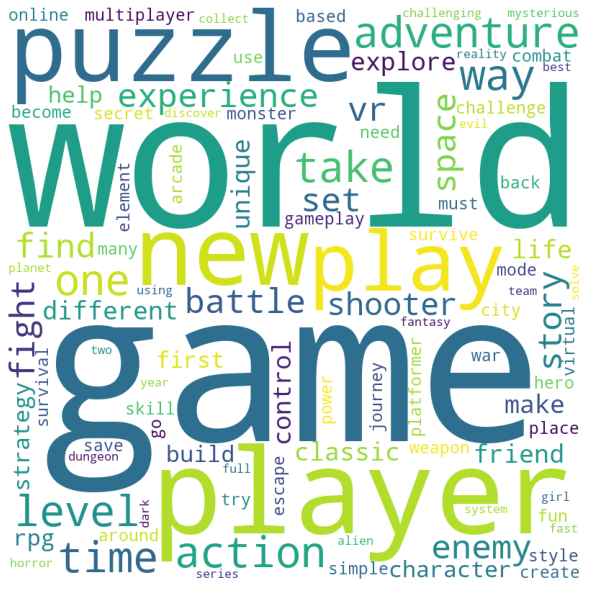

In [22]:
# création d'un WordCloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tokens_str)
 
# afficher le WordCloud image                     
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Test sur les meilleurs jeux [0->20K]

In [23]:
# copie du dasatet complet
df_full2 = df_full.copy()

In [24]:
# creation d'un masque pour ne travailler que sur les jeux entre 0 et 20K owner_median
df_full2 = df_full2[df_full2["owner_median"] == 10000]
df_full2.shape

(18529, 403)

In [25]:
# tri par owner_median
df_full2 = df_full2.sort_values(by="nb_review",ascending=False).head(100)
df_full2

,steam_appid,short_description,name,release_date,english,developer,publisher,platforms,categories,genres,...,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu
20828,819500,fear wolf competitive battle royale fps vostok...,Fear The Wolves,2019-02-06,1,Vostok Games,Focus Home Interactive,windows,Multi-player;Online Multi-Player;Online Co-op;...,Action;Adventure;Massively Multiplayer,...,0,0,0,10000.0,0,20000,1,1880,20000.0,339800.0
23964,921390,《武林志》是一款由蜗牛游戏旗下独立游戏团队 “ 江湖工作室 ” 所开发的一款pc角色扮演类单...,武林志（Wushu Chronicles）,2019-04-09,0,JiangHu Studio,Snail Games,windows,Single-player,Adventure;Casual;Indie;RPG;Simulation,...,0,0,0,10000.0,0,20000,0,1046,20000.0,219800.0
2922,295950,quot master meteor blade quot cold weapon batt...,新流星搜劍錄,2017-12-20,0,Titans,Titans,windows,Multi-player;Online Multi-Player;MMO,Violent;Action;Adventure;Indie;Massively Multi...,...,0,0,0,10000.0,0,20000,0,987,20000.0,309800.0
9096,477730,hire hero build army prevail battle try keep e...,Eador. Imperium,2017-01-27,1,Snowbird Games,Snowbird Games,windows,Single-player;Steam Achievements;Steam Trading...,Indie;RPG;Strategy,...,0,0,0,10000.0,0,20000,1,953,20000.0,299800.0
9586,495990,guo hengyi yao fengyi childhood sweetheart rel...,True Love ～Confide to the Maple～,2016-10-05,1,SP-time,SP-time,windows,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,...,0,0,0,10000.0,0,20000,1,940,20000.0,179800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22944,884260,ad escape option akane prepares final battle r...,Akane,2018-09-10,1,Ludic Studios,Ludic Studios,windows;mac;linux,Single-player;Steam Achievements;Full controll...,Action;Casual;Indie,...,0,0,0,10000.0,0,20000,1,433,20000.0,79800.0
10141,510420,creaky old tavern forgotten corner videogame u...,The Hex,2018-10-16,1,Daniel Mullins Games,Daniel Mullins Games,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Indie,...,0,0,0,10000.0,0,20000,1,431,20000.0,143800.0
14902,653950,story forced smile coming term past love—but r...,Your Smile Beyond Twilight:黄昏下的月台上,2017-06-23,1,Lingtan Studio,Lingtan Studio,windows,Single-player;Steam Achievements;Steam Cloud,Adventure;Indie,...,0,0,0,10000.0,0,20000,1,426,20000.0,31800.0
22902,882710,fantastic danmaku festival touhou project fanf...,東方幕華祭 TouHou Makuka Sai ~ Fantastic Danmaku Fe...,2018-08-16,1,東方幕華祭制作组,東方幕華祭制作组;Starship Studio,windows,Single-player;Steam Achievements;Steam Trading...,Action;Adventure;Casual;Indie,...,0,0,0,10000.0,0,20000,0,425,20000.0,123800.0


In [26]:
# vectorisation des mots
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(df_full2['short_description'])
short_des_transformed = cv.transform(df_full2['short_description'])

In [27]:
# extraire les informations et création du DataFrame
short_des_vectorized = pd.DataFrame(columns = cv.get_feature_names_out(), 
                                    data = short_des_transformed.toarray())

In [28]:
# compter l'occurence de chaque mot
tokens = short_des_vectorized.sum(axis = 0).sort_values(ascending = False)
tokens

game          58
world         25
story         16
new           14
play          13
              ..
connecting     1
logic          1
loot           1
looting        1
雪山上            1
Length: 1279, dtype: int64

In [29]:
# joindre les mots en une seule chaine de caractères
tokens_str_2 = ' '.join(tokens.head(100).index)
tokens_str_2

'game world story new play find experience battle player girl one explore fight become way action shooter survival weapon tactical life character discover others style set secret simulator different dragon first visual vr use universe adventure music multiplayer novel studio rpg create journey combat love classic friend turnbased also school take time horror unique robot original park living part mansion human beat mode fps online card build becomes begin capture mysterious powerful danmaku going level best three theme escape underground ultimate amp steam touhou dungeon system element fly event bus chinese unforgiving high allows try evil hope customize creature everything'

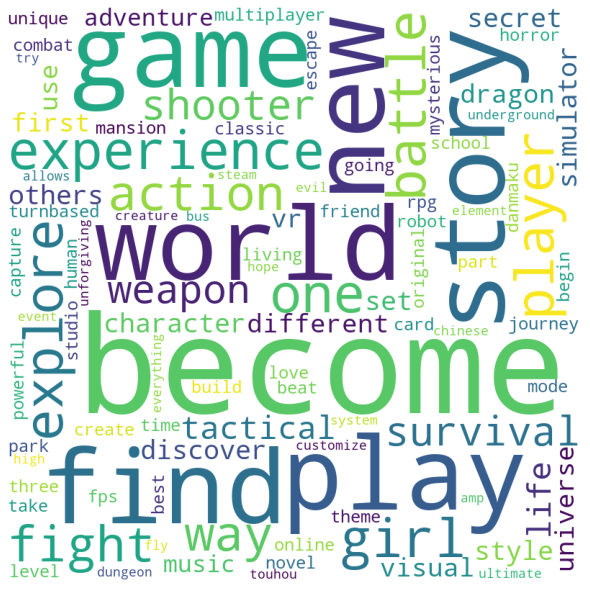

In [30]:
# création d'un WordCloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tokens_str_2)
 
# afficher le WordCloud image                     
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [31]:
score = 0
test = 'play world number online action game engage incredibly realistic brand terrorist warfare wildly popular teambased game ally teammate complete strategic mission take enemy site rescue hostage role affect team success team success affect role'
test = test.split()
tokens_str = ' '.join(tokens.head(100).index)
tokens_str = tokens_str.split()

for word in tokens_str:
    if word in test:
        score += 1
score

6

# Création du DF final

In [32]:
df_final = df_full.copy()
df_final = df_final[df_final["owner_median"] == 10000]
df_final.shape

(18529, 403)

In [33]:
df_full['score_descriptif'] = score
for i in range(len(df_full['short_description'])):
    score = 0
    test = df_full['short_description'][i]
    tokens_str_2 = ' '.join(tokens.head(100).index)

    for word in tokens_str:
        if word in test:
            score += 1
    df_full['score_descriptif'][i] = score

/var/folders/2v/q2m3z6n903v7y2z5y_1vx1j00000gn/T/ipykernel_70556/2972490017.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['score_descriptif'][i] = score


In [37]:
df_full

,steam_appid,short_description,name,release_date,english,developer,publisher,platforms,categories,genres,...,zombies,e_sports,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,score_descriptif
0,10,play world number online action game engage in...,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,550,15000000.0,10000000,20000000,0,127873,15000000.0,1.078500e+08,6
1,30,enlist intense brand axis v allied teamplay se...,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,...,0,0,7500000.0,5000000,10000000,1,3814,7500000.0,2.992500e+07,7
2,50,return black mesa research facility one milita...,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,7500000.0,5000000,10000000,0,5538,7500000.0,2.992500e+07,8
3,70,named game year publication valve debut title ...,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,...,0,0,7500000.0,5000000,10000000,1,28855,7500000.0,5.392500e+07,12
4,80,extensive tour duty campaign nearlimitless num...,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,15000000.0,10000000,20000000,0,13559,15000000.0,1.078500e+08,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26862,1065230,room pandora thirdperson interactive puzzle ga...,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,Single-player;Steam Achievements,Adventure;Casual;Indie,...,0,0,10000.0,0,20000,0,3,624.0,1.304160e+03,1
26863,1065570,cyber gun hardcore firstperson shooter platfor...,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,Single-player,Action;Adventure;Indie,...,0,0,10000.0,0,20000,0,9,1872.0,3.163680e+03,3
26864,1065650,super star blast space based game challenging ...,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,...,0,0,10000.0,0,20000,1,1,208.0,8.299200e+02,5
26865,1066700,pursue snowwhite deer enchanted forest discove...,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,Single-player;Steam Cloud,Adventure;Casual;Indie,...,0,0,10000.0,0,20000,1,2,416.0,2.159040e+03,2


In [35]:
#df_full.to_csv(r'../raw_data/df_with_score.csv', index = False)